In [1]:
from dna.config import BlackBoxDnaConfig, NGramsConfigGenerator
from models.config import CompletionModelConfig
from dna.model import BlackBoxDNADetector
from pydantic import SecretStr
import os
import dotenv

dotenv.load_dotenv()

True

In [2]:
model_config = CompletionModelConfig(
    api_key=SecretStr(os.getenv("OPENAI_API_KEY")),
    model_name="gpt-4o-mini",
    user_prompt="Complete the following sentences for a total of around {n_words} words:",
    system_prompt="You are a helpful assistant that continues the sentences provided.",
    temperature=0.5
)

ngrams_config = NGramsConfigGenerator()
"""
N_min=4,
N_max=25,
stemmer=PorterStemmer(),
func=lambda n: n * math.log(n),
stopwords=spacy.load("en_core_web_sm").Defaults.stop_words
"""

blackbox_config = BlackBoxDnaConfig(
    truncation=0.5,
    K=10,
    threshold=0.00025,
    model_config=model_config,
    ngrams_config=ngrams_config,
)

In [3]:
detector = BlackBoxDNADetector(blackbox_config)

In [4]:
from datasets import load_dataset

/opt/anaconda3/envs/MangoTruth/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
xlsum = load_dataset('anakib1/mango-truth', 'xlsum')

In [6]:
xlsum = xlsum.remove_columns(["prompt", "user_id"])

In [7]:
from tqdm import tqdm
import random

y_true, y_pred = [], []

for _ in tqdm(range(100)):
    i = random.randint(0, len(xlsum["train"]) - 1)
    proba = detector.predict_proba(xlsum["train"][i]["output"])
    y_true.append(1 if xlsum["train"][i]["label"] else 0)
    y_pred.append(proba[1])

100%|██████████| 100/100 [06:01<00:00,  3.62s/it]


SplitConclusion(metrics=ClassificationMetrics(tpr_at_1_percent_fpr=0.14155555555555557, tpr_at_10_percent_fpr=0.7883720930232558, auc=0.8614163614163614, f1=0.6666666666666666, accuracy=0.93, precision=0.5833333333333334, recall=0.7777777777777778), representations=ClassificationRepresentations(roc_curve=<Figure size 640x480 with 1 Axes>, clf_report=<Figure size 640x480 with 2 Axes>))

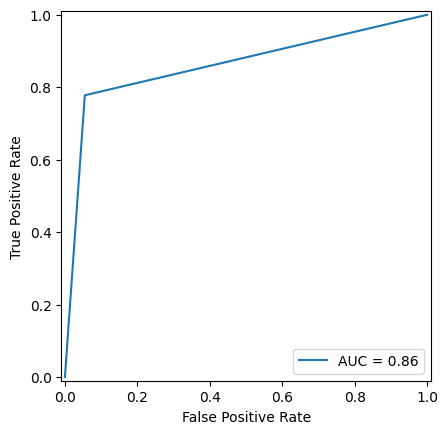

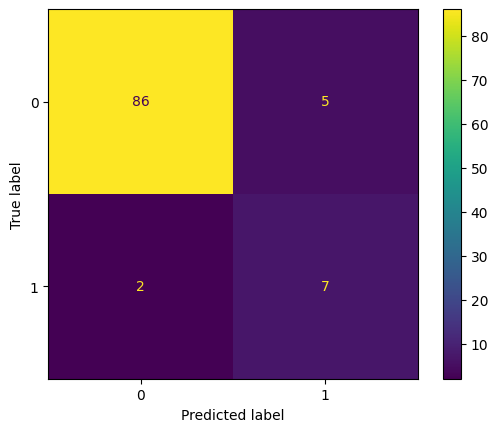

In [8]:
from utils.training import calculate_classification
import numpy as np

calculate_classification(np.array(y_true), np.array(y_pred))